In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
directory = "Datasets/QS"
data_2018 = pd.read_csv(directory+"/2018-QS-World-University-Rankings.csv", encoding='unicode_escape')
data_2019 = pd.read_csv(directory+"/2019-QS-World-University-Rankings.csv", encoding='unicode_escape')
data_2020 = pd.read_csv(directory+"/2020-QS-World-University-Rankings.csv", encoding='unicode_escape')

In [3]:
data_2018 = data_2018.head(400)
data_2019 = data_2019.head(500)
data_2020 = data_2020.head(500)

cols = ['Academic Reputation Score', 'Employer Reputation Score','Faculty Student Score', 'Citations per Faculty Score', 'International Faculty Score', 'International Students Score', 'Overall Score']

for x in cols:
    data_2018[x]= data_2018[x].replace("401+",np.nan)
    data_2018[x] = data_2018[x].astype(float)

for x in cols:
    data_2019[x]= data_2019[x].replace("501+",np.nan)
    data_2019[x]= data_2019[x].replace("601+",np.nan)
    data_2019[x] = data_2019[x].astype(float)

for x in cols:
    data_2020[x]= data_2020[x].replace("501+",np.nan)
    data_2020[x]= data_2020[x].replace("601+",np.nan)
    data_2020[x] = data_2020[x].astype(float)


In [4]:
indexes_2018=[]
indexes_2019=[]
indexes_2020=[]

for i in range(len(data_2018)):
    if data_2018.iloc[i].isnull().sum()>=15:
        indexes_2018.append(i)
for i in range(len(data_2019)):
    if data_2019.iloc[i].isnull().sum()>=15:
        indexes_2019.append(i)
for i in range(len(data_2020)):
    if data_2020.iloc[i].isnull().sum()>=15:
        indexes_2020.append(i)

for i in indexes_2018:
    data_2018=data_2018.drop(index=i)
for i in indexes_2019:
    data_2019=data_2019.drop(index=i)
for i in indexes_2020:
    data_2020=data_2020.drop(index=i)
    
for i in range(len(data_2020)):
    data_2020['Institution Name'].iloc[i]=data_2020['Institution Name'].iloc[i].upper()
    
data_2018['Institution Name'].iloc[0]="MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)"

# Finding Unique values

In [5]:
df_2018=data_2018.copy()
df_2019=data_2019.copy()
df_2020=data_2020.copy()

indexes_2018=[]
indexes_2019=[]
indexes_2020=[]

for i in range(len(data_2018)):
    if data_2018['Institution Name'].iloc[i] not in data_2019['Institution Name'].unique() or  data_2018['Institution Name'].iloc[i] not in data_2020['Institution Name'].unique():
        indexes_2018.append(i)
        
for i in range(len(data_2019)):
    if data_2019['Institution Name'].iloc[i] not in data_2018['Institution Name'].unique() or  data_2019['Institution Name'].iloc[i] not in data_2020['Institution Name'].unique():
        indexes_2019.append(i)
    
for i in range(len(data_2020)):
    if data_2020['Institution Name'].iloc[i] not in data_2019['Institution Name'].unique() or  data_2020['Institution Name'].iloc[i] not in data_2018['Institution Name'].unique():
        indexes_2020.append(i)

data_2018=data_2018.drop(data_2018.index[indexes_2018])
data_2019=data_2019.drop(data_2019.index[indexes_2019])
data_2020=data_2020.drop(data_2020.index[indexes_2020])
    
data_2018

,2018,2017,Institution Name,Country,Classification Size,Focus,Research Intensity,Age,Status,Academic Reputation Score,...,Employer Reputation Rank,Faculty Student Score,Faculty Student Rank,Citations per Faculty Score,Citations per Faculty Rank,International Faculty Score,International Faculty Rank,International Students Score,International Students Rank,Overall Score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5.0,B,100.0,...,4,100.0,14,99.9,8,100.0,36,96.1,70,100.0
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5.0,B,100.0,...,5,100.0,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5.0,B,100.0,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5.0,B,99.5,...,77,100.0,3,100.0,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5.0,A,100.0,...,1,100.0,10,78.3,75,97.4,87,97.7,57,95.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,391=,411-420,UNIVERSITY OF UTAH,United States,L,FC,VH,5.0,A,21.2,...,401+,60.1,221,38.2,335,16.3,401+,17.2,401+,31.0
395,395=,401-410,ILLINOIS INSTITUTE OF TECHNOLOGY,United States,M,CO,VH,5.0,B,23.6,...,401+,19.0,401+,49.7,238,21.4,401+,100.0,14,30.7
396,397,431-440,HUFS Â HANKUK (KOREA) UNIVERSITY OF FOREIGN S...,South Korea,L,CO,MD,4.0,B,18.7,...,401+,78.3,127,2.1,401+,37.9,355,39.0,362,30.6
397,398=,421-430,"GOLDSMITHS, UNIVERSITY OF LONDON",United Kingdom,M,FO,VH,5.0,A,27.3,...,401+,25.5,401+,19.7,401+,85.0,172,97.2,60,30.5


In [6]:
print(data_2018.columns)

Index(['2018', '2017', 'Institution Name', 'Country', 'Classification Size',
       'Focus', 'Research Intensity', 'Age', 'Status',
       'Academic Reputation Score', 'Academic Reputation Rank',
       'Employer Reputation Score', 'Employer Reputation Rank',
       'Faculty Student Score', 'Faculty Student Rank',
       'Citations per Faculty Score', 'Citations per Faculty Rank',
       'International Faculty Score', 'International Faculty Rank',
       'International Students Score', 'International Students Rank',
       'Overall Score'],
      dtype='object')


In [7]:
cols = ['Institution Name','Academic Reputation Score', 'Employer Reputation Score','Faculty Student Score', 'Citations per Faculty Score', 'International Faculty Score', 'International Students Score', 'Overall Score']
netdata = pd.DataFrame()
x = data_2018[cols].assign(year = 2018)
x['Rank'] = np.array(range(1,len(x)+1), dtype=int)
netdata = pd.concat([netdata,x])
x = data_2019[cols].assign(year = 2019)
x['Rank'] = np.array(range(1,len(x)+1), dtype=int)
netdata = pd.concat([netdata,x])
x = data_2020[cols].assign(year = 2020)
x['Rank'] = np.array(range(1,len(x)+1), dtype=int)
netdata = pd.concat([netdata,x])

display(netdata)

,Institution Name,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Citations per Faculty Score,International Faculty Score,International Students Score,Overall Score,year,Rank
0,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),100.0,100.0,100.0,99.9,100.0,96.1,100.0,2018,1
1,STANFORD UNIVERSITY,100.0,100.0,100.0,99.4,99.6,72.7,98.7,2018,2
2,HARVARD UNIVERSITY,100.0,100.0,98.3,99.9,96.5,75.2,98.4,2018,3
3,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),99.5,85.4,100.0,100.0,93.4,89.2,97.7,2018,4
4,UNIVERSITY OF CAMBRIDGE,100.0,100.0,100.0,78.3,97.4,97.7,95.6,2018,5
...,...,...,...,...,...,...,...,...,...,...
430,UNIVERSITY OF LIEGE,18.5,25.5,25.3,33.5,45.9,57.8,27.0,2020,319
431,BOSTON COLLEGE,22.9,21.1,37.5,23.6,43.6,19.5,26.7,2020,320
437,UNIVERSIDAD DE BELGRANO,7.7,19.0,89.2,1.1,6.9,55.8,26.3,2020,321
441,ASTON UNIVERSITY,10.9,41.9,13.2,35.7,97.3,54.4,26.0,2020,322


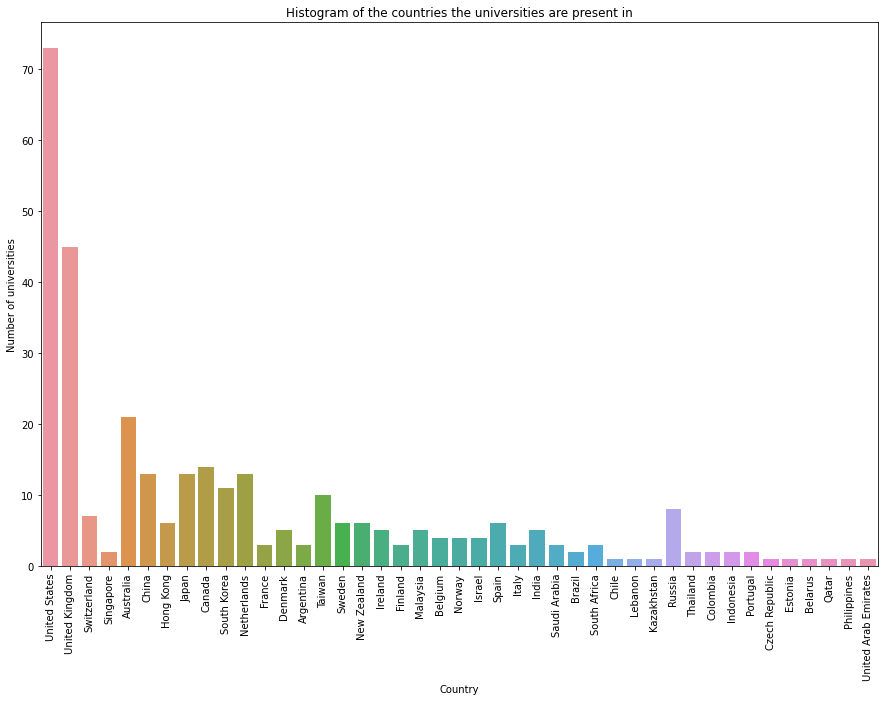

In [8]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
sns.countplot(data=data_2018,x="Country")
plt.title("Histogram of the countries the universities are present in")
plt.ylabel("Number of universities")
plt.show()

In [9]:
netdata.dtypes
cols = ['Academic Reputation Score', 'Employer Reputation Score','Faculty Student Score', 'Citations per Faculty Score', 'International Faculty Score', 'International Students Score', 'Overall Score']

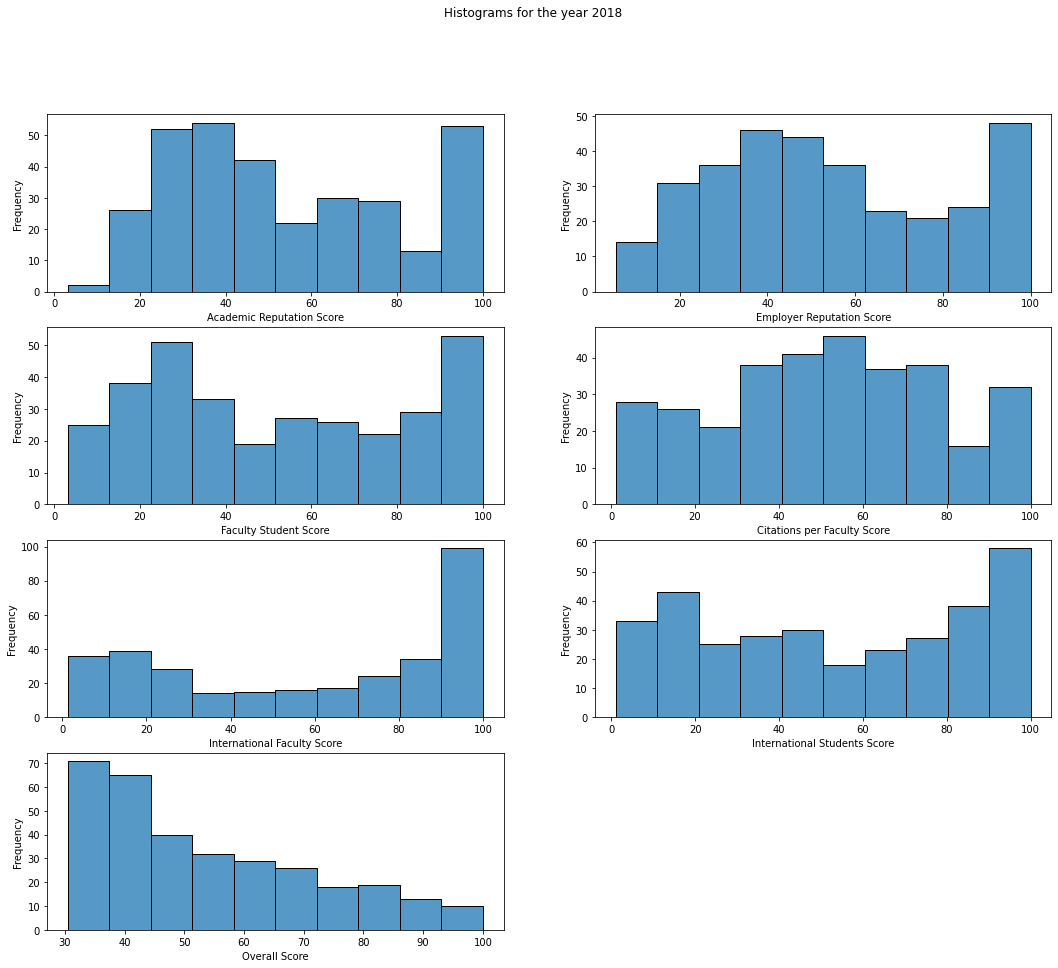

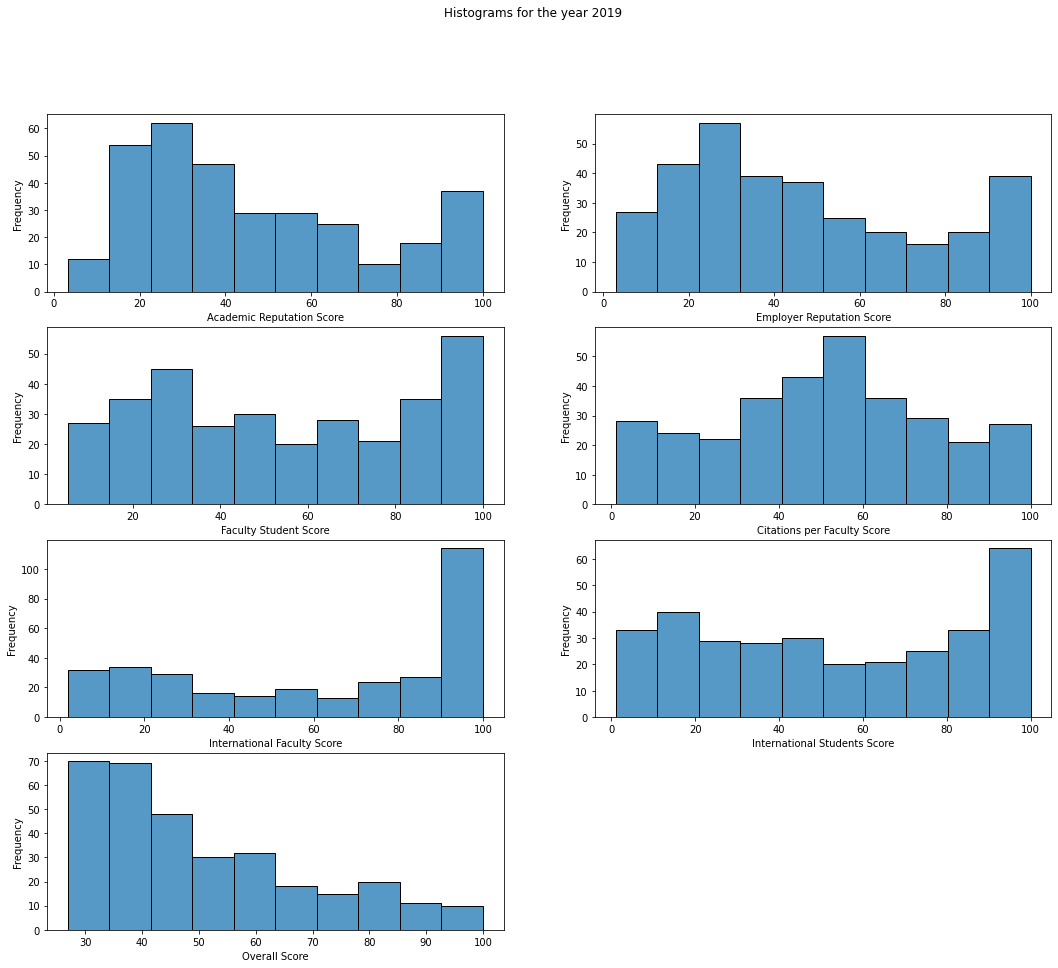

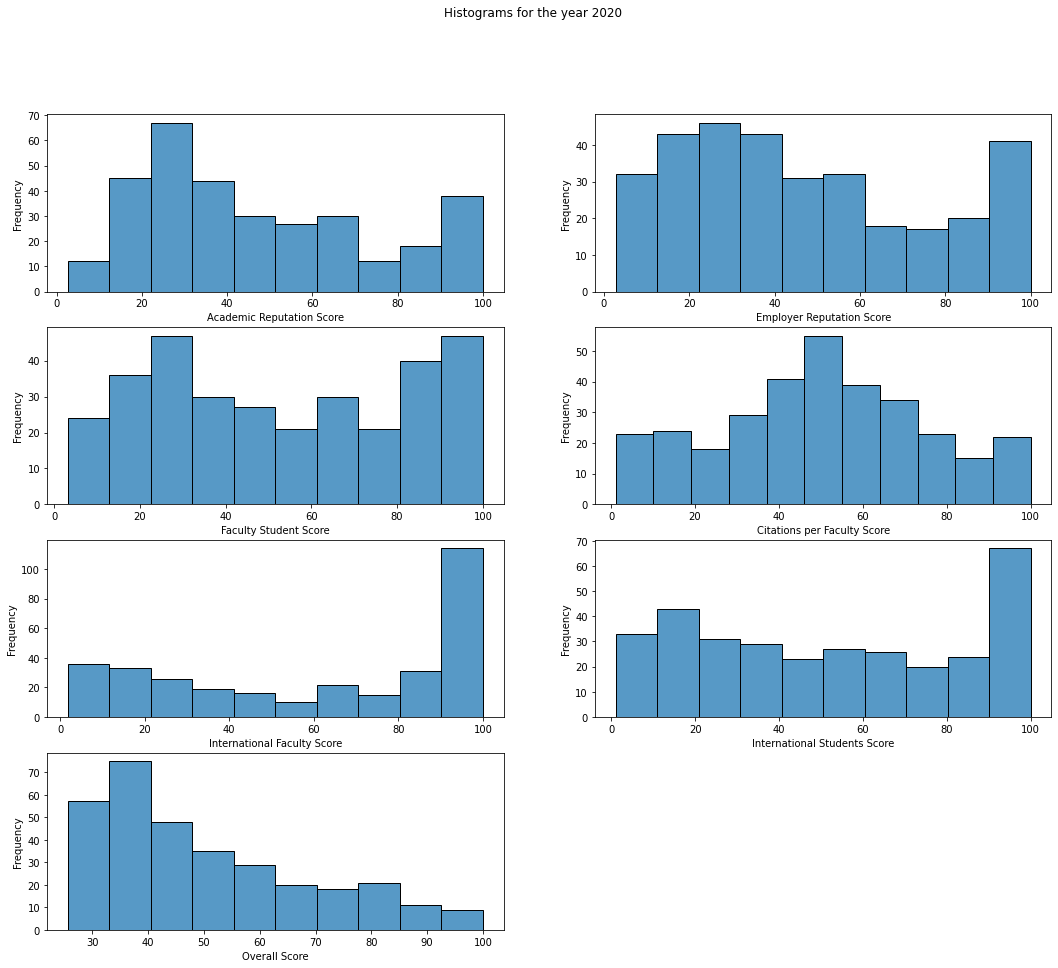

In [10]:
plt.rcParams['figure.figsize'] = [18,15]
for i,j in netdata.groupby('year'):
  cols = ['Academic Reputation Score', 'Employer Reputation Score','Faculty Student Score', 'Citations per Faculty Score', 'International Faculty Score', 'International Students Score', 'Overall Score','Rank']
  stat_data = j[cols]
  cols = ['Academic Reputation Score', 'Employer Reputation Score','Faculty Student Score', 'Citations per Faculty Score', 'International Faculty Score', 'International Students Score', 'Overall Score']
  plt.figure()
  plt.suptitle(f"Histograms for the year {i}")
  for k in range(len(cols)):
    plt.subplot(4,2,k+1)
    sns.histplot(stat_data[cols[k]], bins='auto')
    plt.xlabel(f"{cols[k]}")
    plt.ylabel(f"Frequency")
  plt.show()

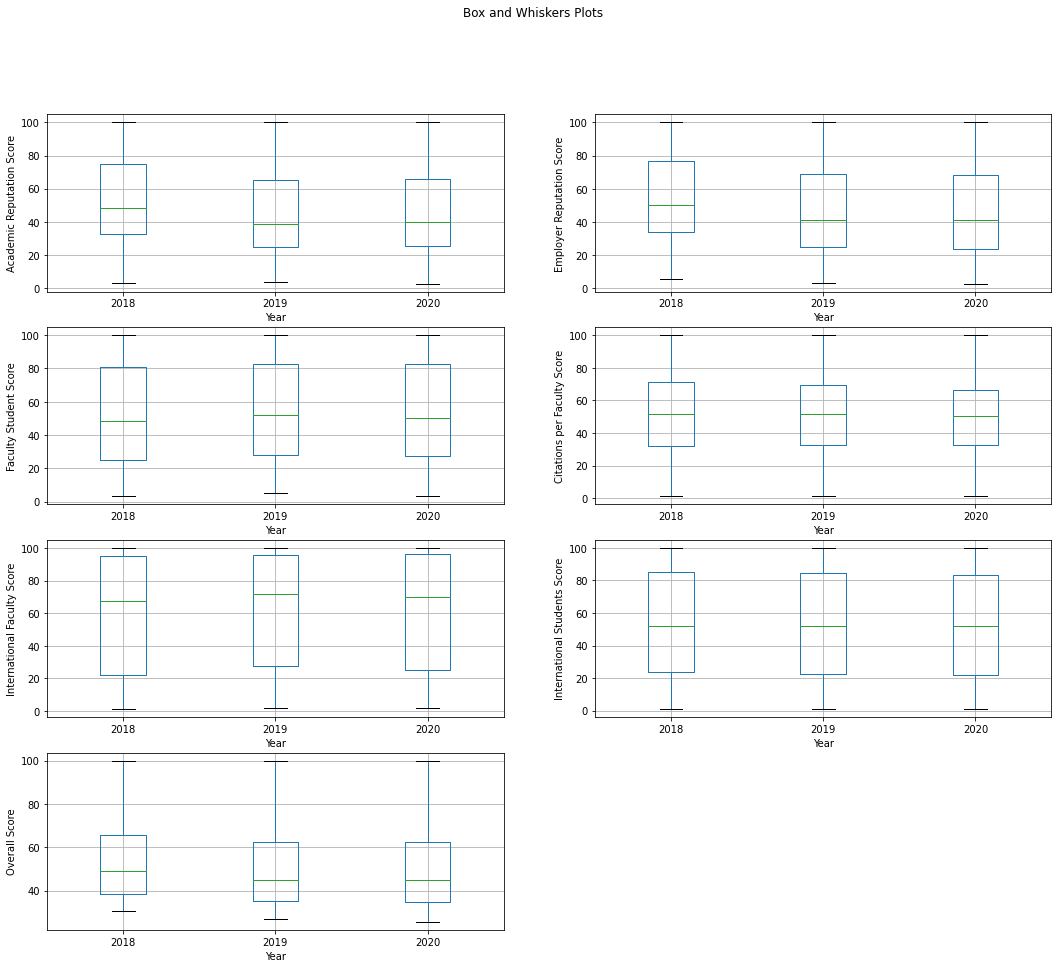

In [11]:
plt.rcParams['figure.figsize'] = [18,15]
plt.figure()
plt.suptitle("Box and Whiskers Plots")
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    plot_dict = {}
    for key,val in netdata.groupby("year"):
      plot_dict[key] = val[cols[i]]
    plot_df = pd.DataFrame(plot_dict)
    plot_df.boxplot()
    plt.xlabel("Year")
    plt.ylabel(cols[i])
plt.show()

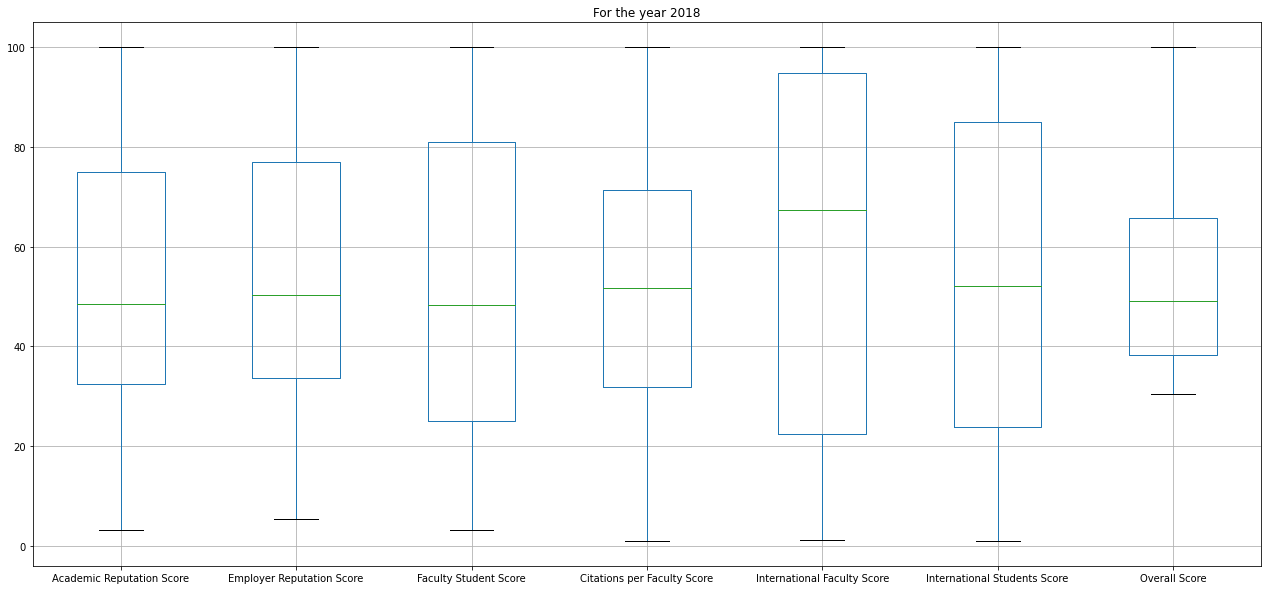

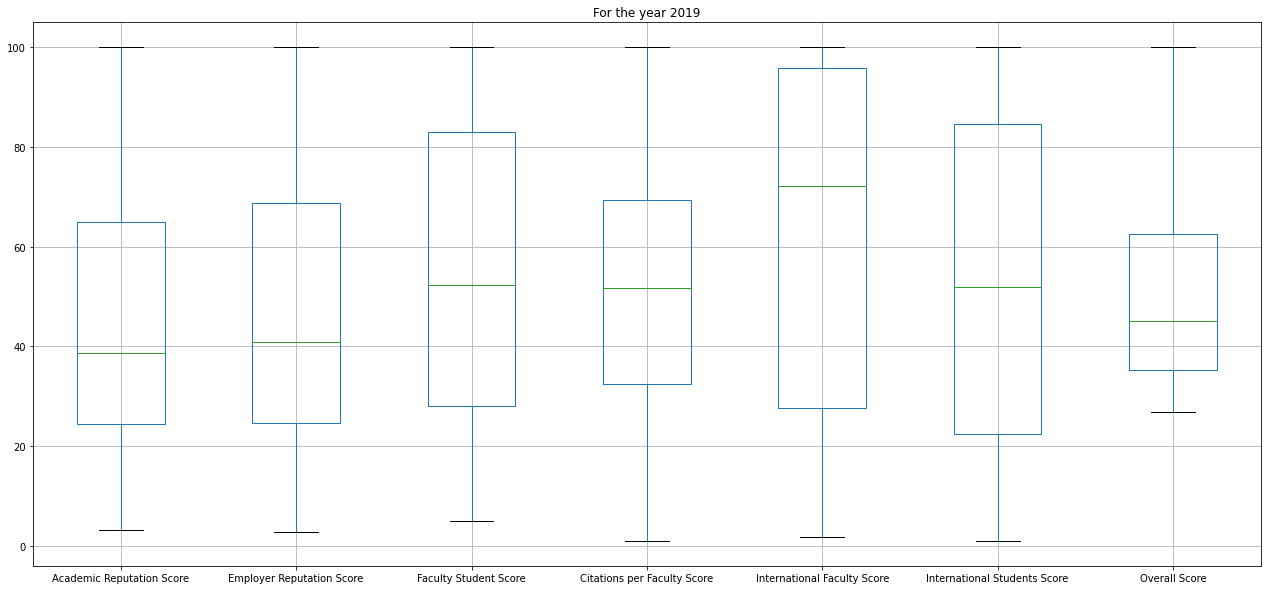

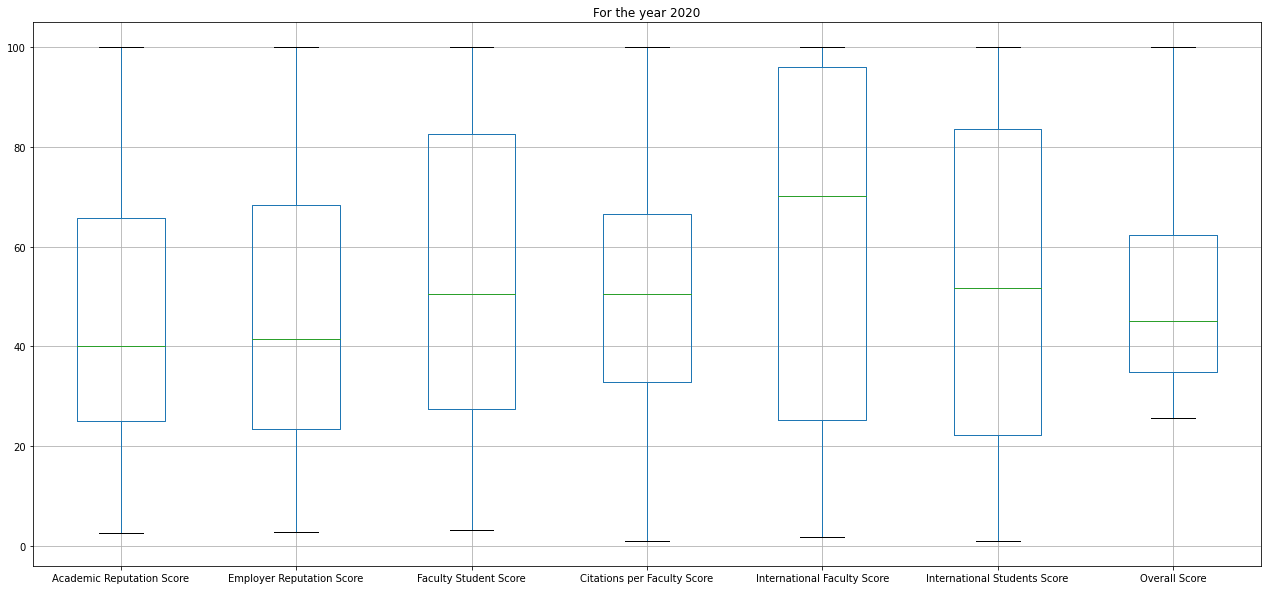

In [12]:
plt.rcParams['figure.figsize'] = [22,10]

for i,j in netdata.groupby("year"):
    plt.title(f"For the year {i}")
    j.boxplot(column=cols, fontsize=10)
    plt.show()

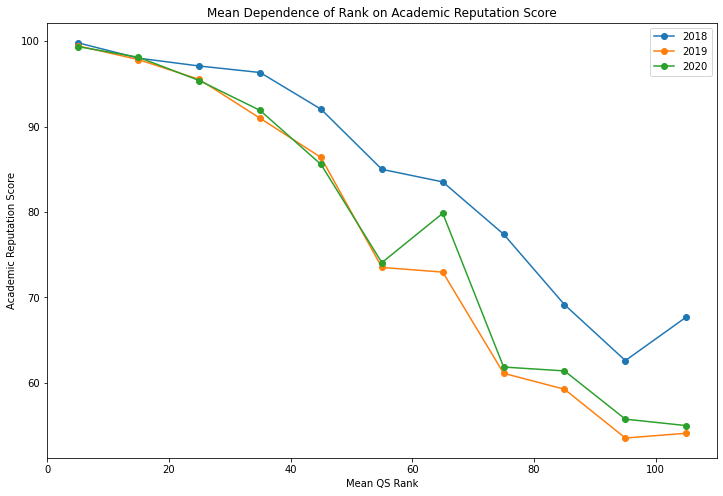

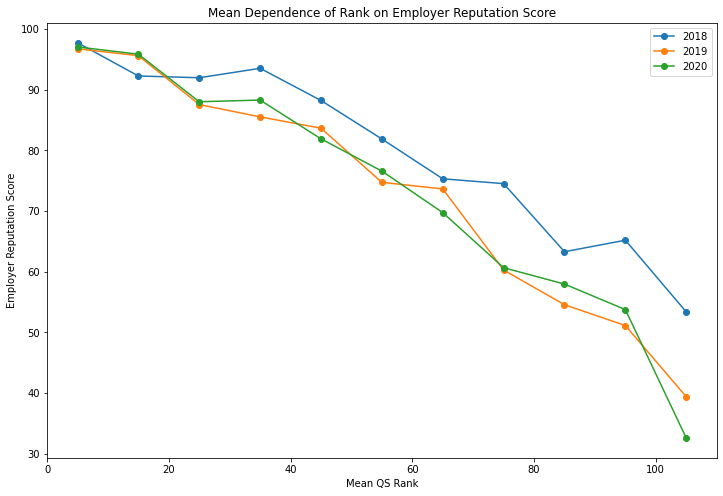

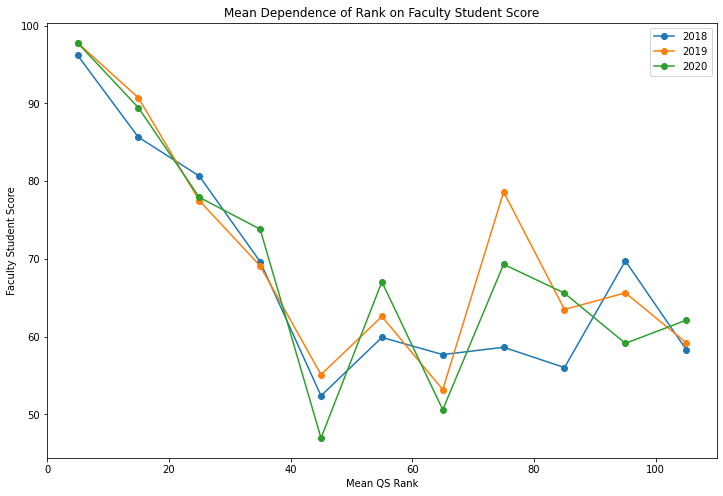

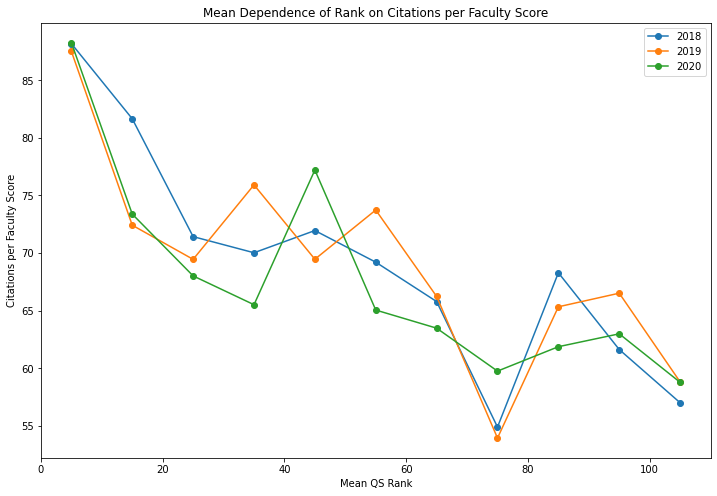

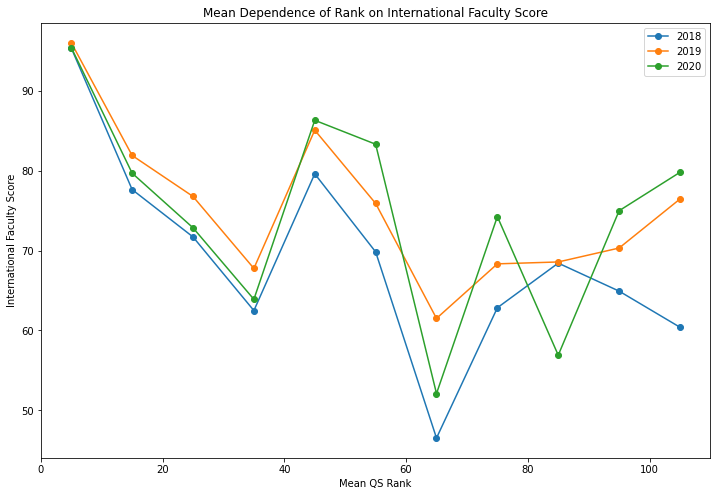

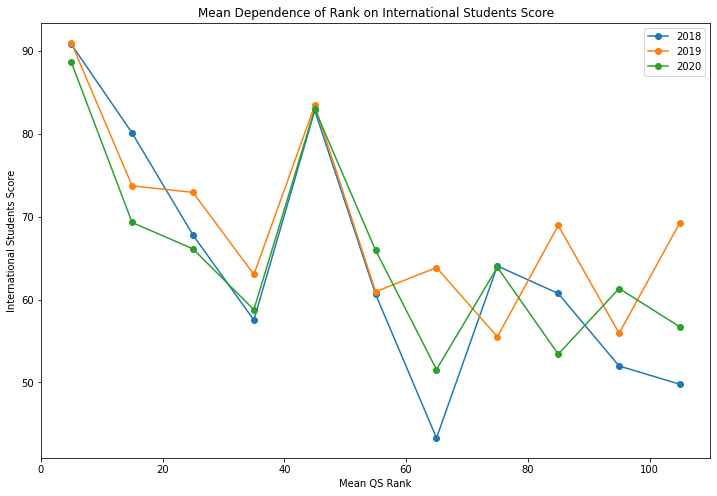

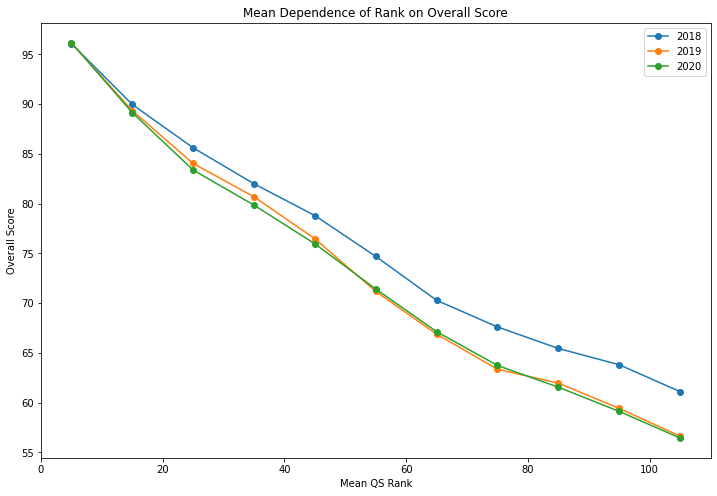

In [13]:
plt.rcParams['figure.figsize'] = [12,8]
for x in cols:
    for i,j in netdata.groupby('year'):
        ranks = list(range(0,101,10))
        y_data = []
        x_data = []
        for rank in ranks:
            y_data += [np.mean(np.array(j.query(f"Rank>={rank} and Rank<={rank+10}")[x]))]
            x_data += [rank+5]
        plt.plot(x_data,y_data,'o-',label=f"{i}")
    plt.title(f"Mean Dependence of Rank on {x}")
    plt.ylabel(f"{x}")
    plt.xlabel("Mean QS Rank")
    plt.legend()
    plt.show()

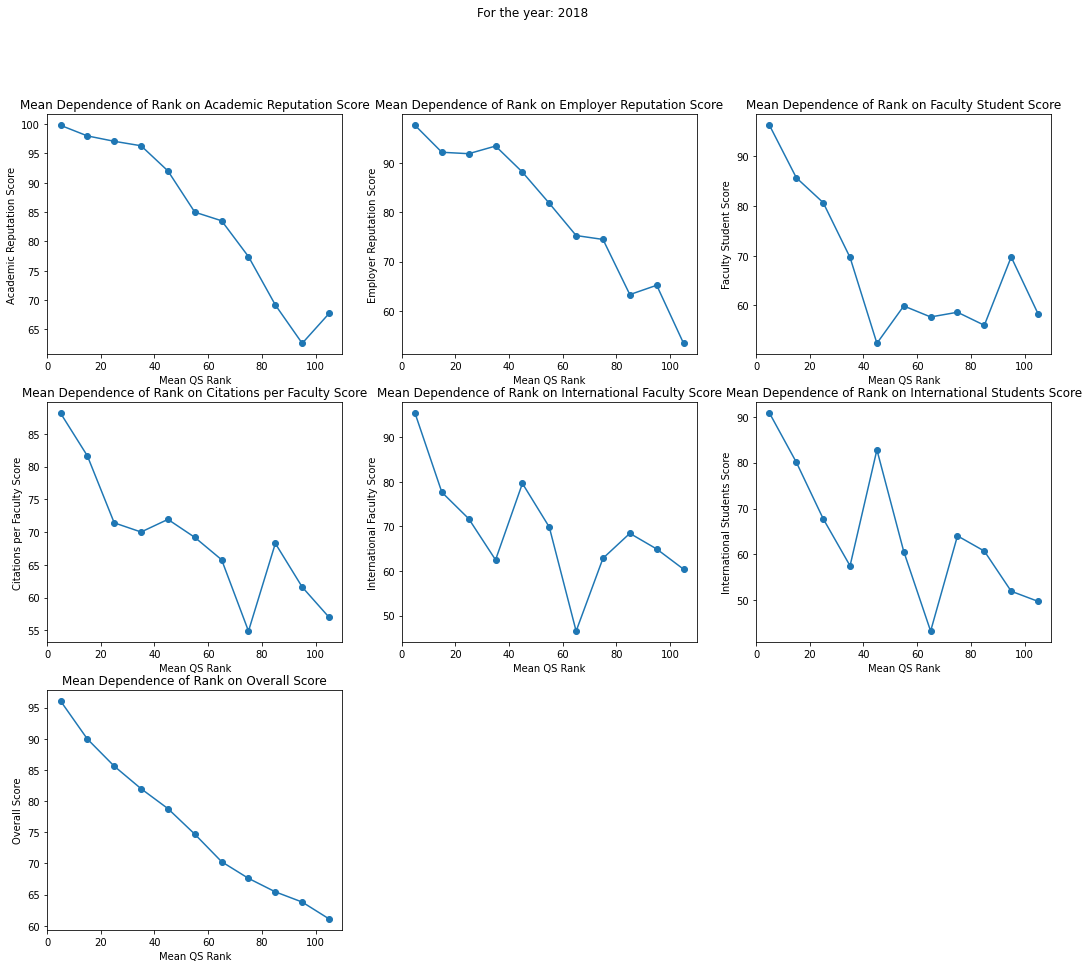

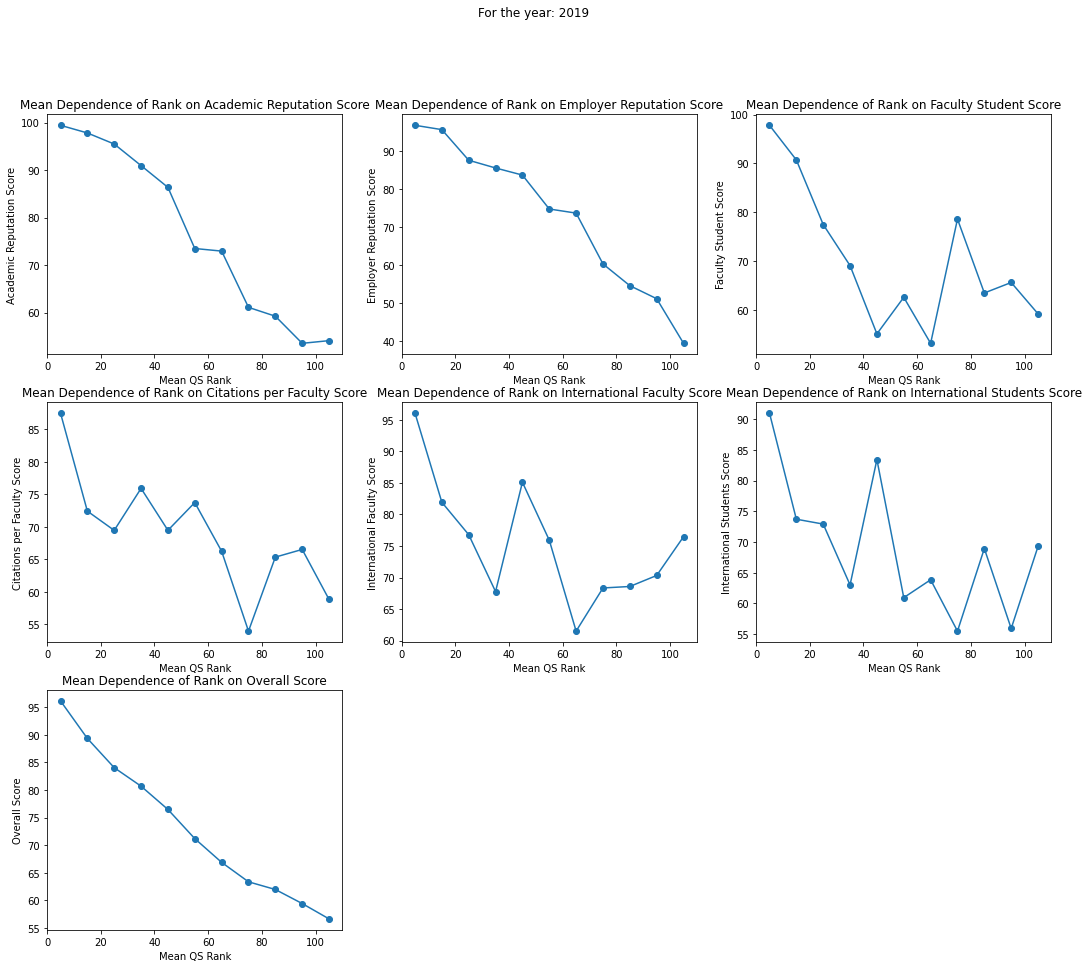

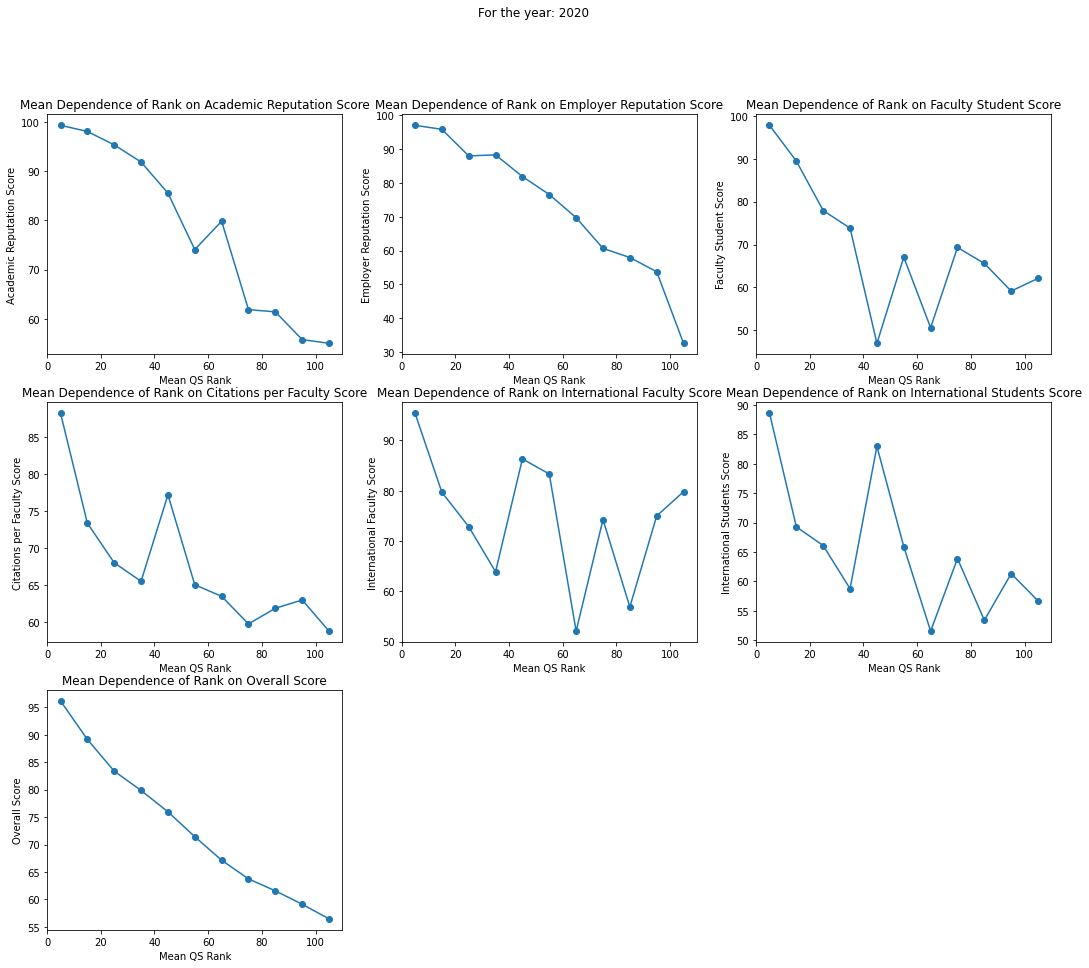

In [14]:
plt.rcParams['figure.figsize'] = [18,15]
for i,j in netdata.groupby('year'):
    plt.figure()
    plt.suptitle(f"For the year: {i}")
    ranks = list(range(0,101,10))
    count = 1
    for x in cols:
        y_data = []
        x_data = []
        for rank in ranks:
            y_data += [np.mean(np.array(j.query(f"Rank>={rank} and Rank<={rank+10}")[x]))]
            x_data += [rank+5]
        plt.subplot(3,3,count)
        plt.plot(x_data,y_data,'o-')
        plt.title(f"Mean Dependence of Rank on {x}")
        plt.ylabel(f"{x}")
        plt.xlabel("Mean QS Rank")
        count += 1
    plt.show()

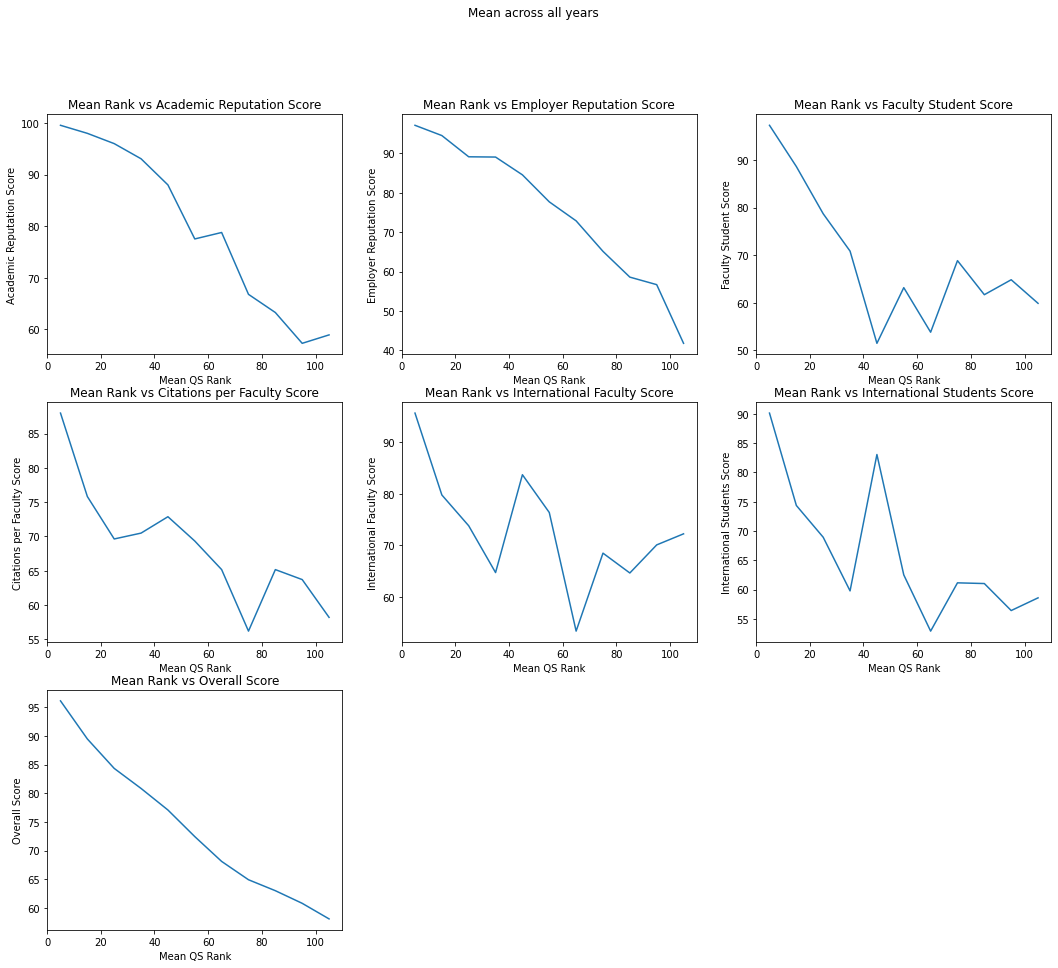

In [15]:
plt.figure()
plt.suptitle("Mean across all years")
count=1
for x in cols:
    x_data = range(5,106,10)
    Y = []
    for i,j in netdata.groupby('year'):
        ranks = list(range(0,101,10))
        y_data = []
        for rank in ranks:
            y_data += [np.mean(np.array(j.query(f"Rank>={rank} and Rank<={rank+10}")[x]))]
        Y += [y_data]
    Y = np.array(Y)
    y = np.mean(Y,axis=0)
    plt.subplot(3,3,count)
    plt.plot(x_data,y)
    plt.title(f"Mean Rank vs {x}")
    plt.ylabel(f"{x}")
    plt.xlabel("Mean QS Rank")
    count+=1
plt.show()

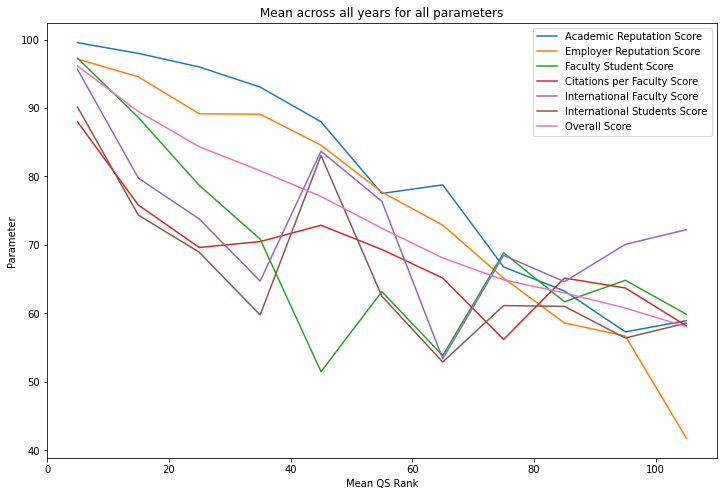

In [16]:
plt.rcParams['figure.figsize'] = [12,8]
count=1
for x in cols:
    x_data = range(5,106,10)
    Y = []
    for i,j in netdata.groupby('year'):
        ranks = list(range(0,101,10))
        y_data = []
        for rank in ranks:
            y_data += [np.mean(np.array(j.query(f"Rank>={rank} and Rank<={rank+10}")[x]))]
        Y += [y_data]
    Y = np.array(Y)
    y = np.mean(Y,axis=0)
    plt.plot(x_data,y,label=x)
plt.title(f"Mean across all years for all parameters")
plt.ylabel("Parameter")
plt.xlabel("Mean QS Rank")
plt.legend()
plt.show()

# Annual plots for all the parameters 

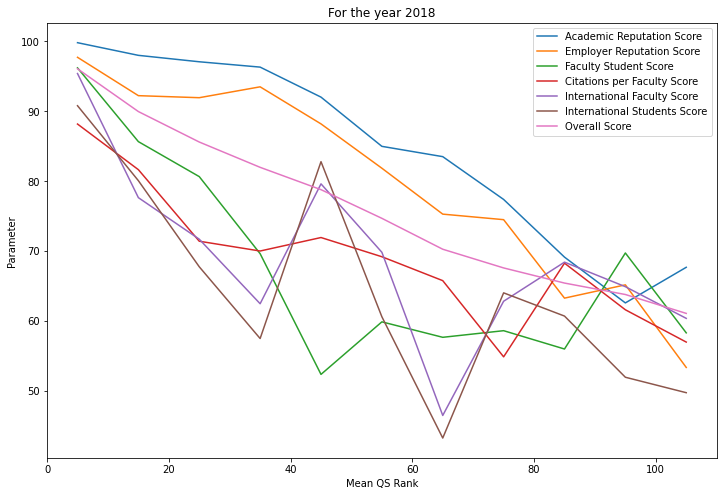

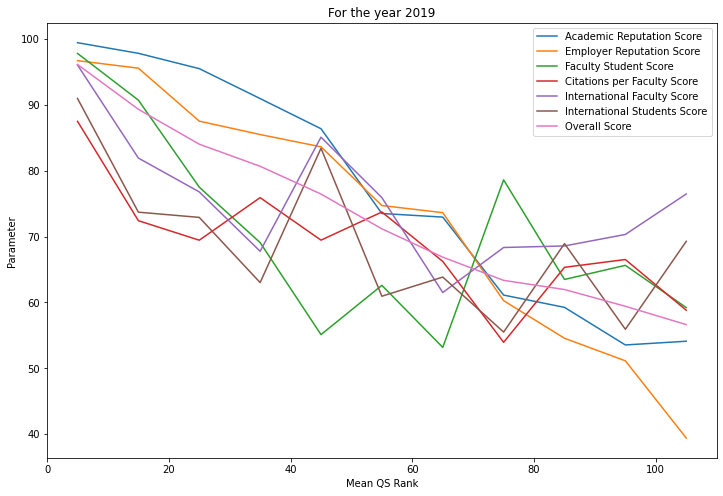

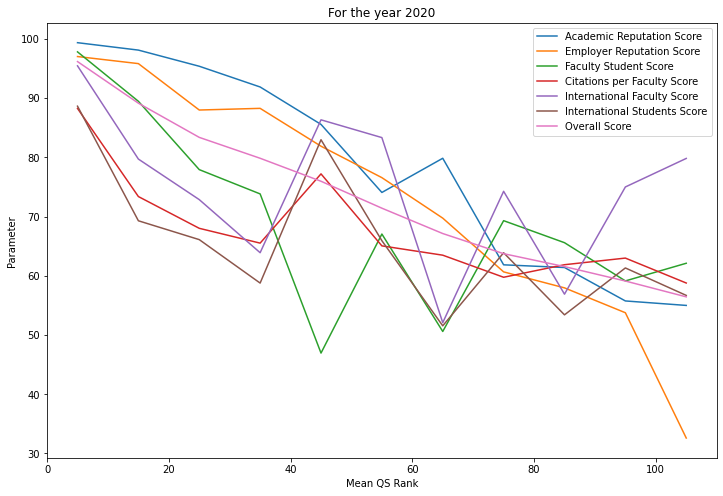

In [17]:
plt.figure()
# 2017,2018,2019,2020,2021
x_data = range(5,106,10)
Y = []
for i,j in netdata.groupby('year'):
    for x in cols:
        ranks = list(range(0,101,10))
        y_data = []
        for rank in ranks:
            y_data += [np.mean(np.array(j.query(f"Rank>={rank} and Rank<={rank+10}")[x]))]
        plt.plot(x_data,y_data,label=x)
    plt.title(f"For the year {i}")
    plt.ylabel(f"Parameter")
    plt.xlabel("Mean QS Rank")
    plt.legend()
    plt.show()

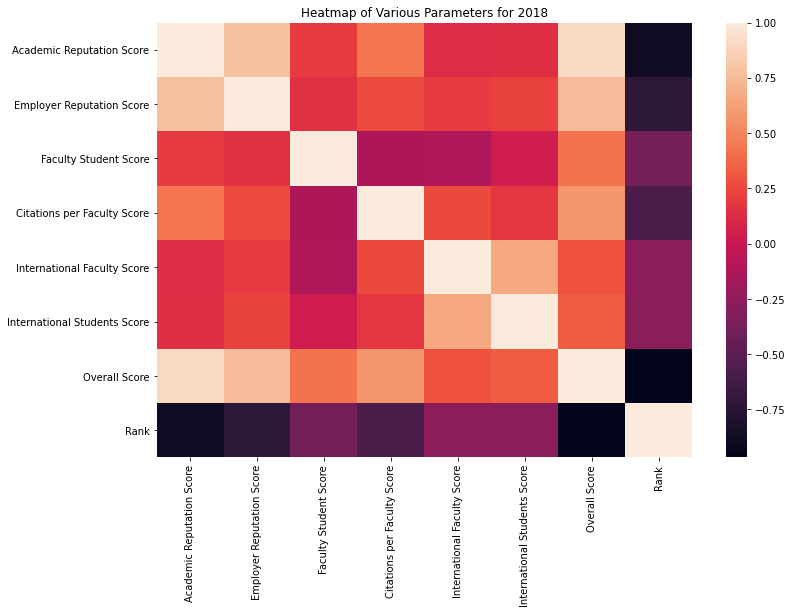

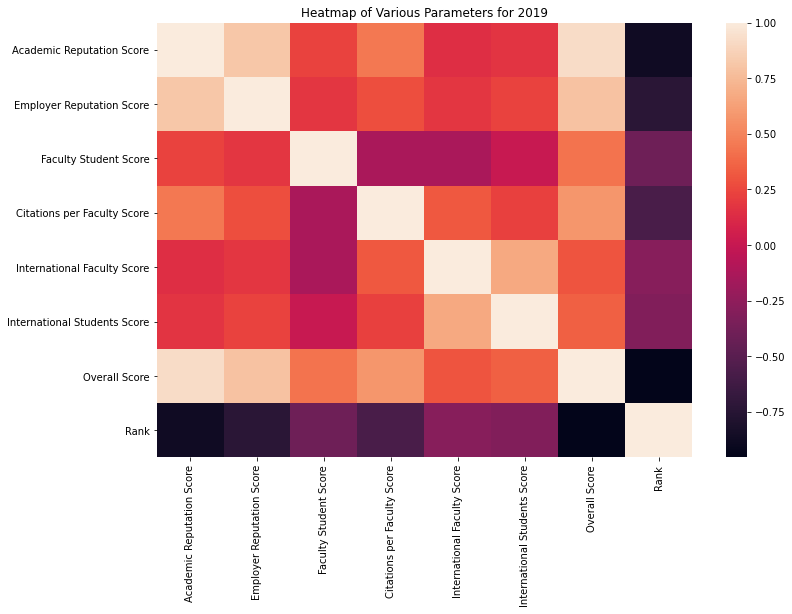

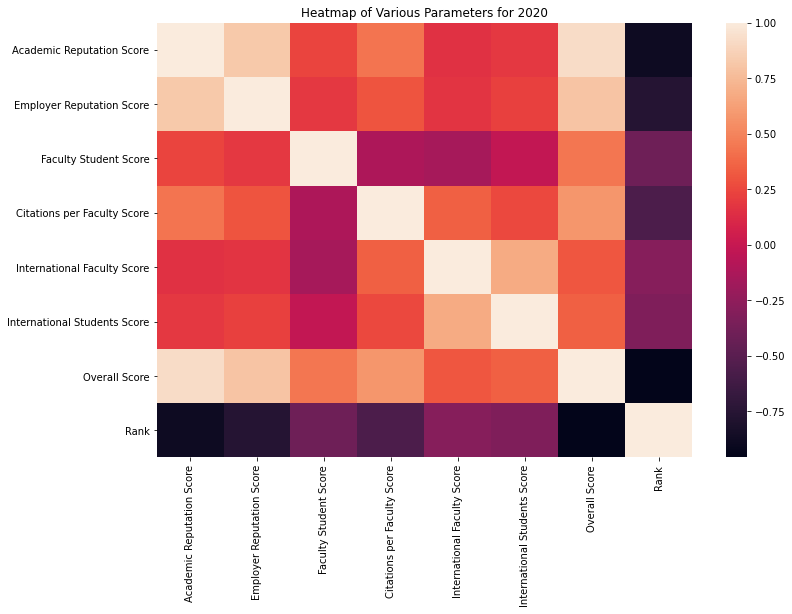

In [18]:
plt.rcParams['figure.figsize'] = [12,8]
cols+=['Rank']
for i,j in netdata.groupby('year'):
    plt.title(f"Heatmap of Various Parameters for {i}")
    sns.heatmap(j[cols].corr())
    plt.show()

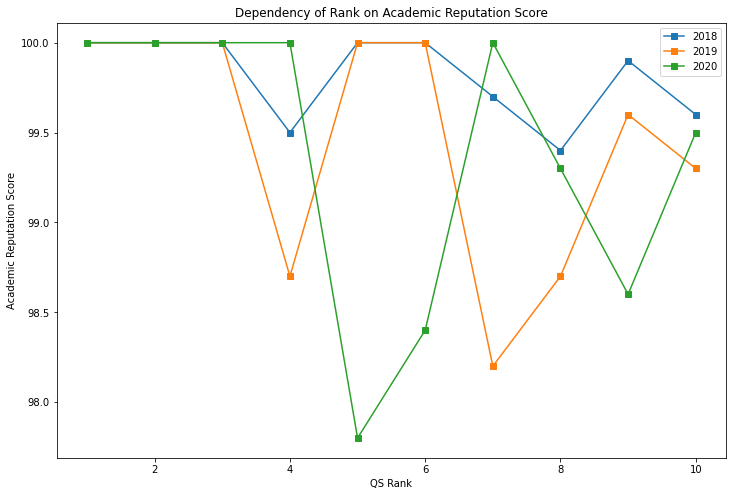

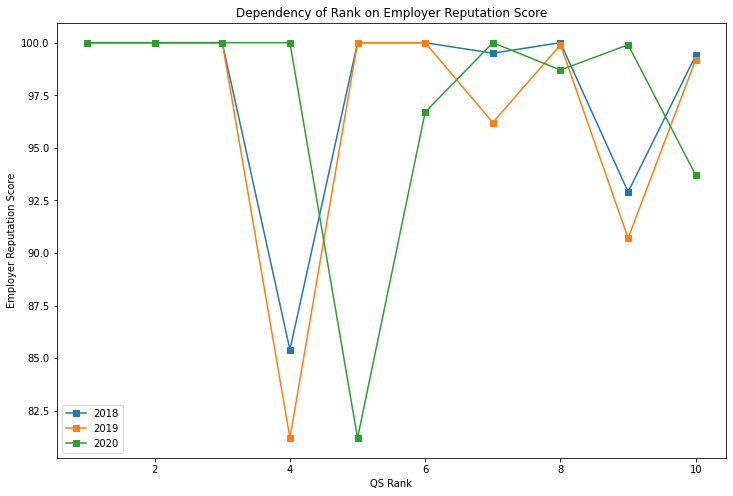

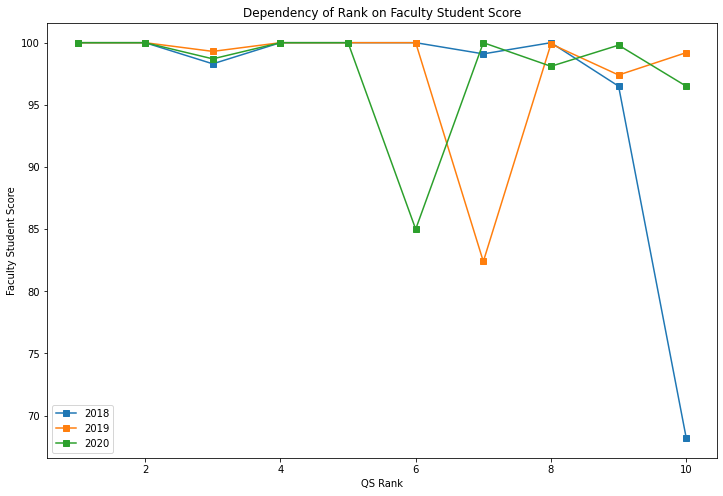

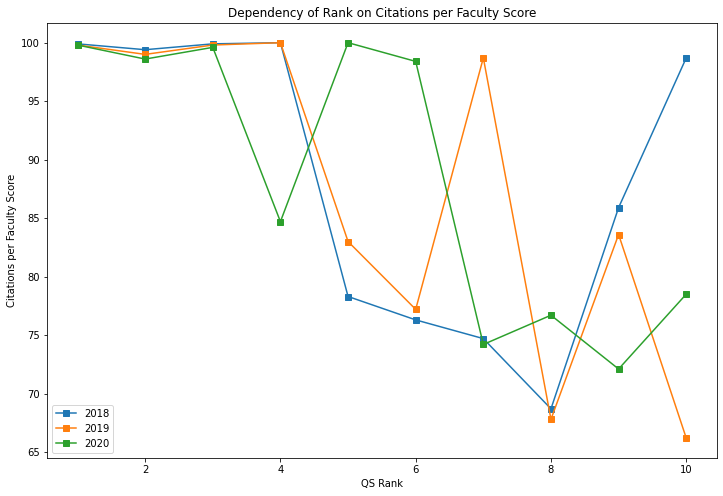

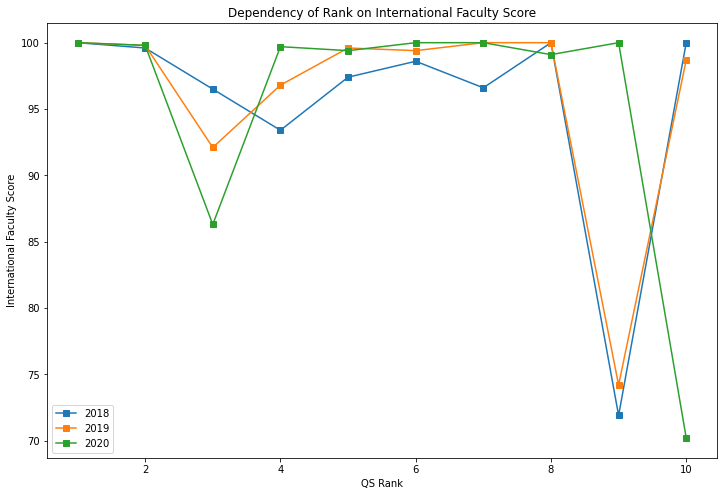

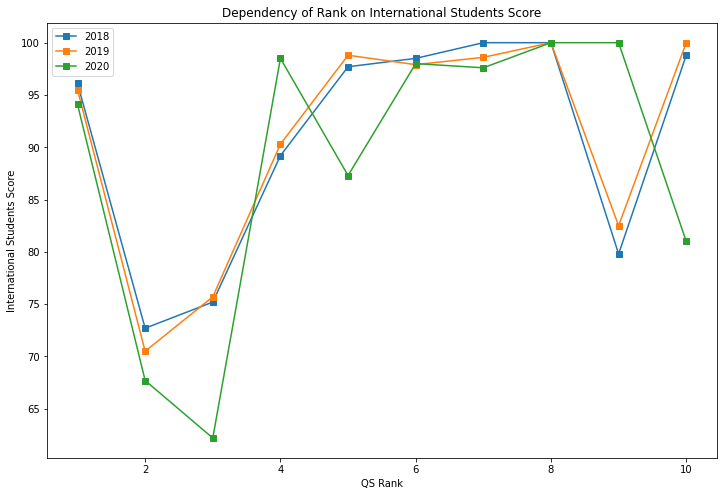

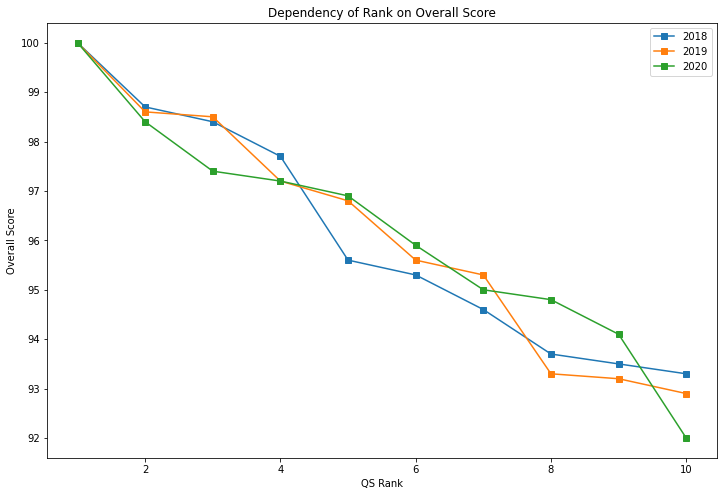

In [19]:
top10data = netdata.query("Rank <= 10")
k = [i for i in cols if i!="Rank"]
for x in k:
    for i,j in top10data.groupby('year'):
        plt.plot(j['Rank'],j[f"{x}"],'s-',label=f"{i}")
    plt.title(f"Dependency of Rank on {x}")
    plt.ylabel(f"{x}")
    plt.xlabel("QS Rank")
    plt.legend()
    plt.show()

In [20]:
top102020 = netdata.query("year==2020")
top102020 = list(top102020.head(10)['Institution Name'])
print(top102020)

['MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)', 'STANFORD UNIVERSITY', 'HARVARD UNIVERSITY', 'UNIVERSITY OF OXFORD', 'CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH)', 'ETH ZURICH (SWISS FEDERAL INSTITUTE OF TECHNOLOGY)', 'UNIVERSITY OF CAMBRIDGE', 'UCL (UNIVERSITY COLLEGE LONDON)', 'IMPERIAL COLLEGE LONDON', 'UNIVERSITY OF CHICAGO']


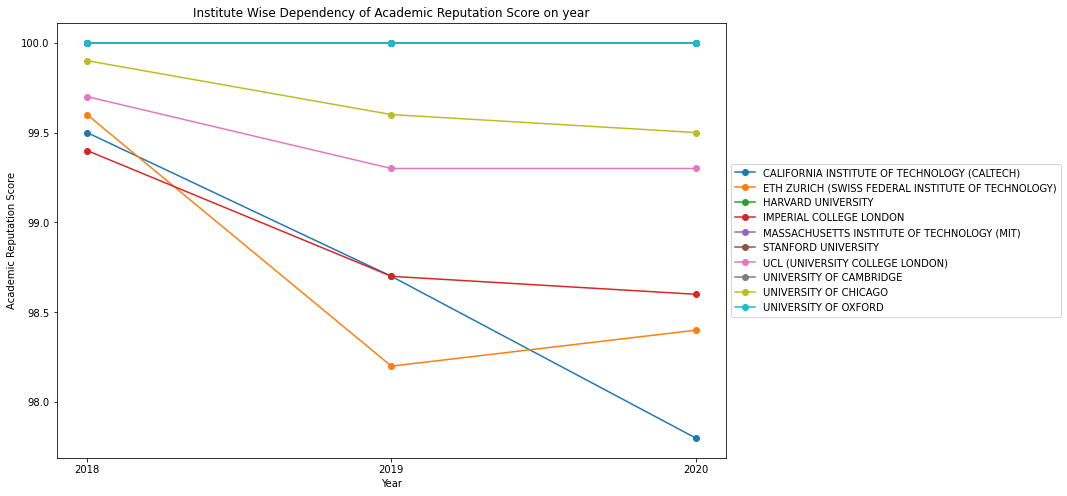

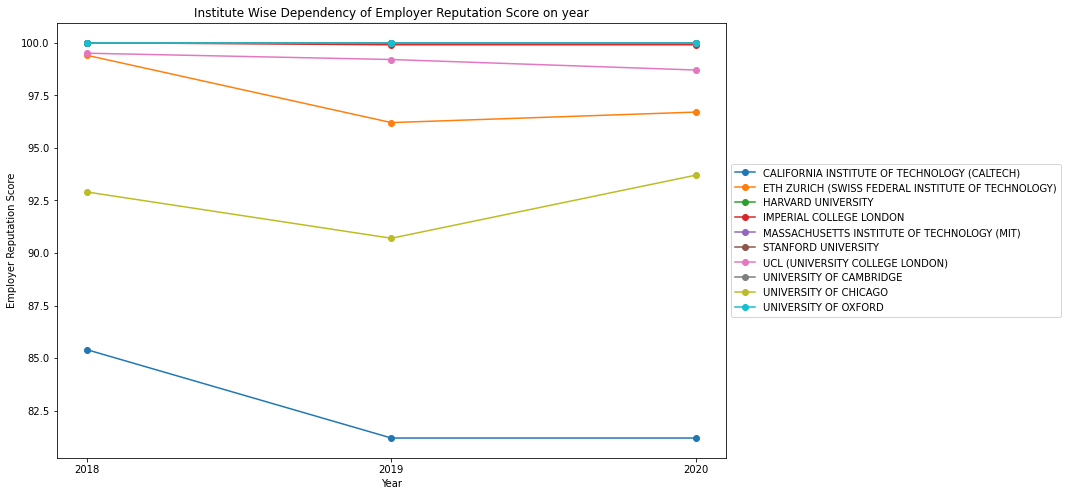

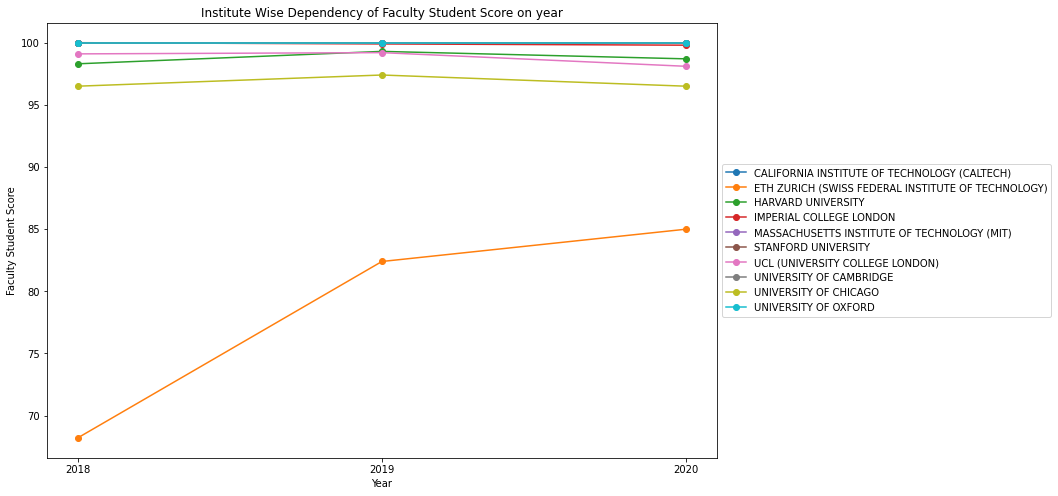

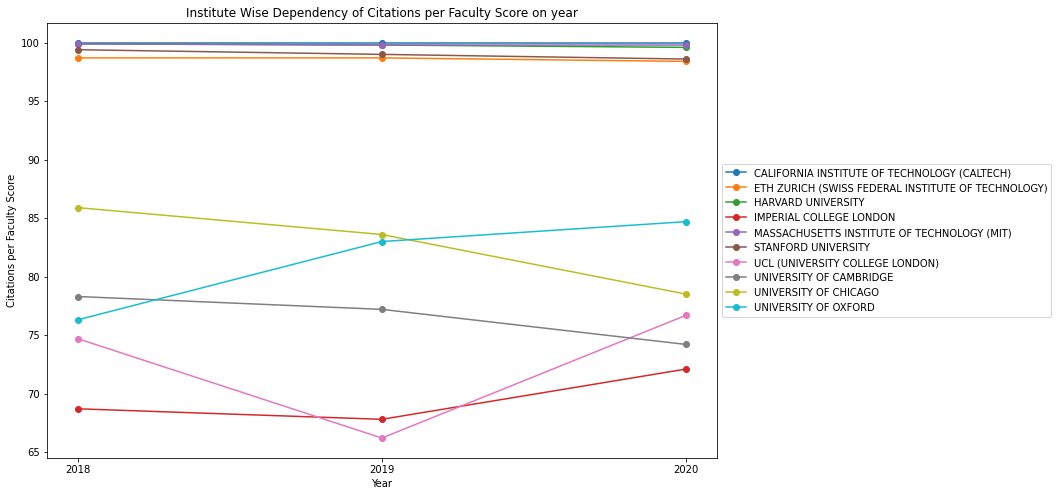

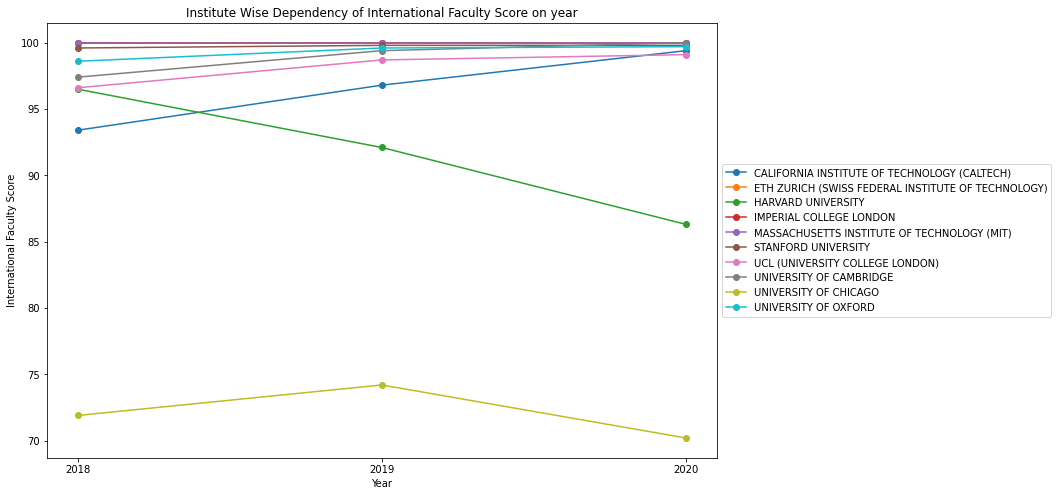

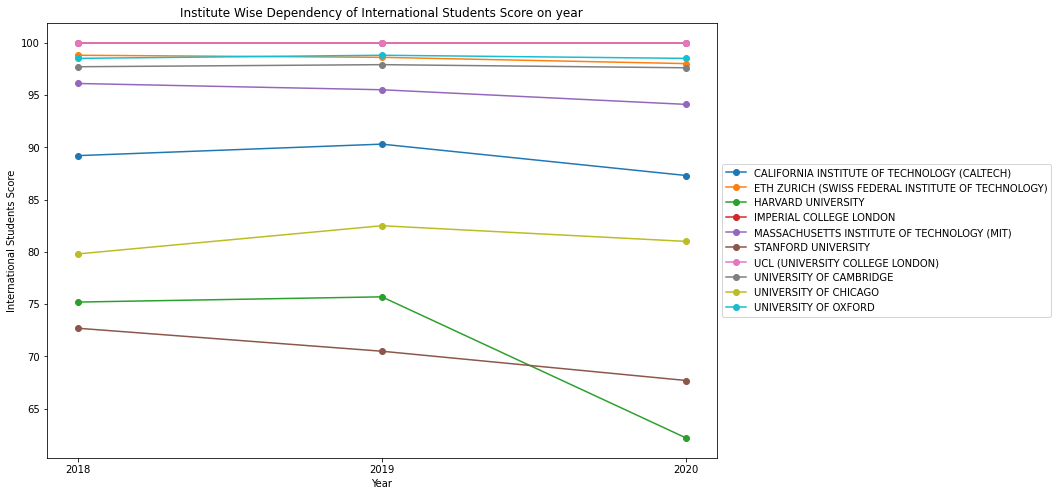

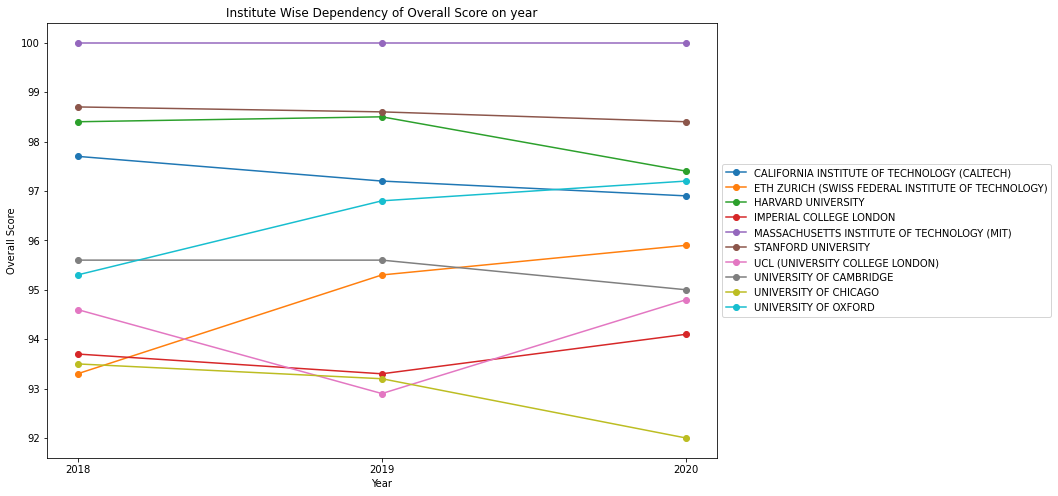

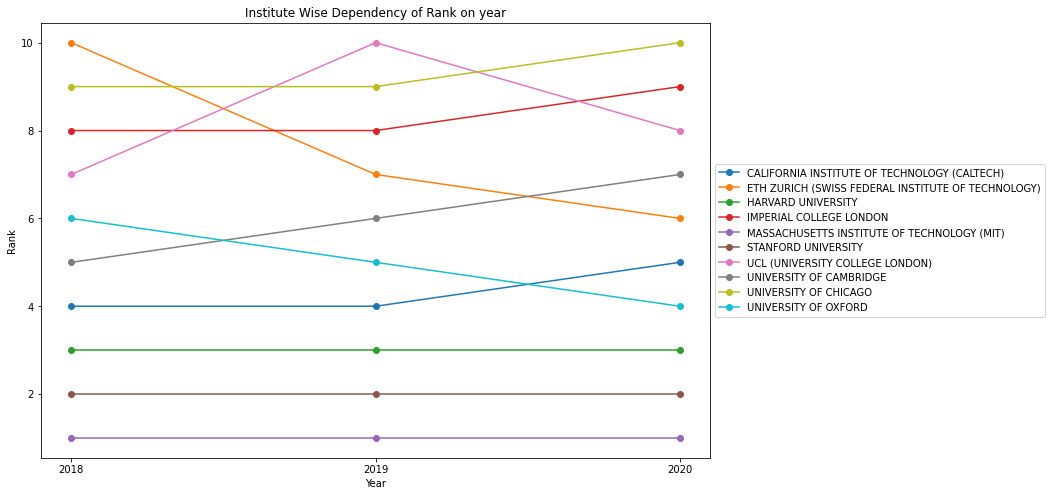

In [21]:
h = cols
for val in h:
    for i,j in netdata.groupby('Institution Name'):
        if(i in top102020):
            plt.plot(j['year'],j[f'{val}'],'o-',label=f"{i}")
    plt.title(f"Institute Wise Dependency of {val} on year")
    plt.ylabel(f"{val}")
    plt.xlabel("Year")
    plt.xticks([2018,2019,2020])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

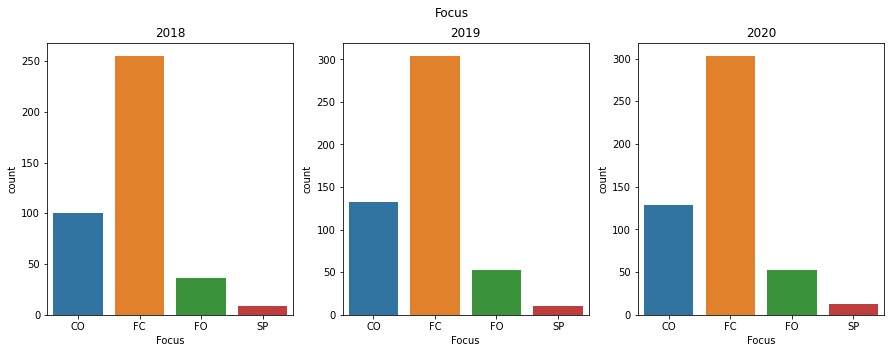

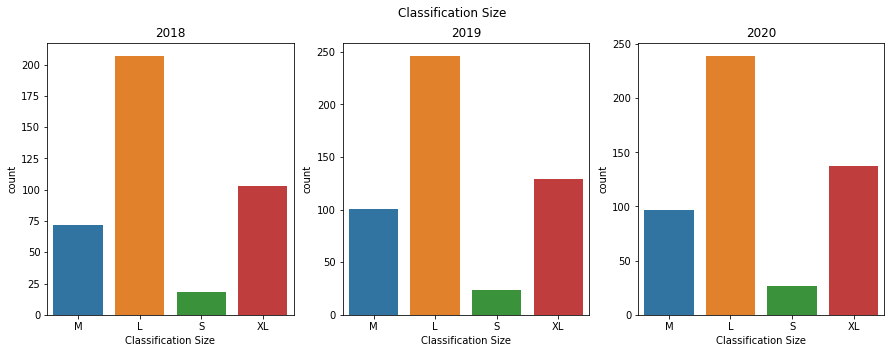

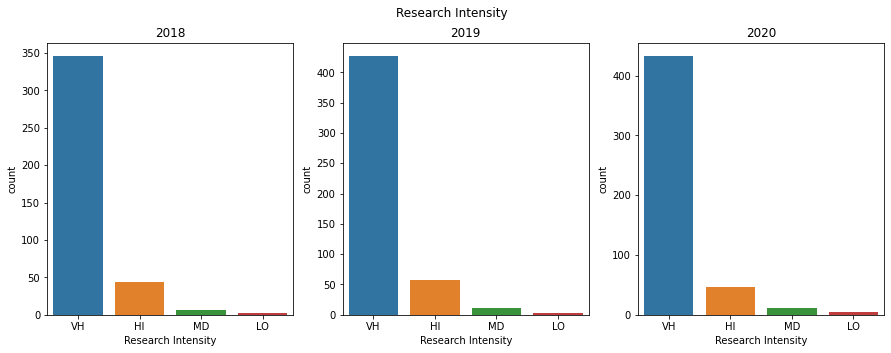

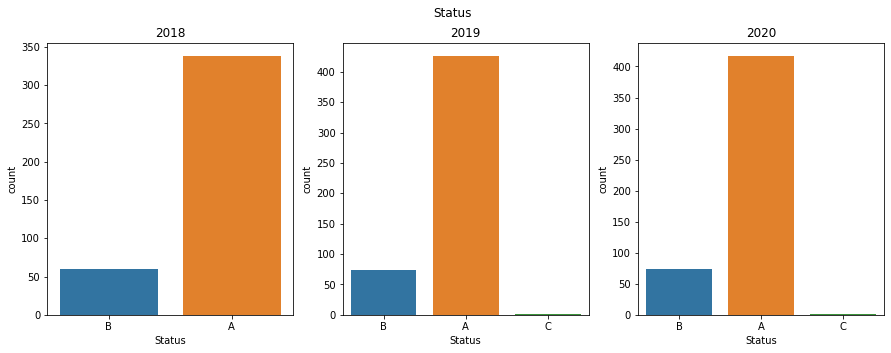

In [22]:
def plot(x,axes,year):
    if year==2018:
        sns.countplot(ax=axes,data=df_2018,x=x)
    elif year==2019:
        sns.countplot(ax=axes,data=df_2019,x=x)
    else:
        sns.countplot(ax=axes,data=df_2020,x=x)
    axes.set_title(year)

def multiple_plots(x):
    fig,axes=plt.subplots(1,3,figsize=(15, 5))
    fig.suptitle(x)
    plot(x,axes[0],2018)
    plot(x,axes[1],2019)
    plot(x,axes[2],2020)
    
multiple_plots('Focus')
multiple_plots('Classification Size')
multiple_plots('Research Intensity')
multiple_plots('Status')

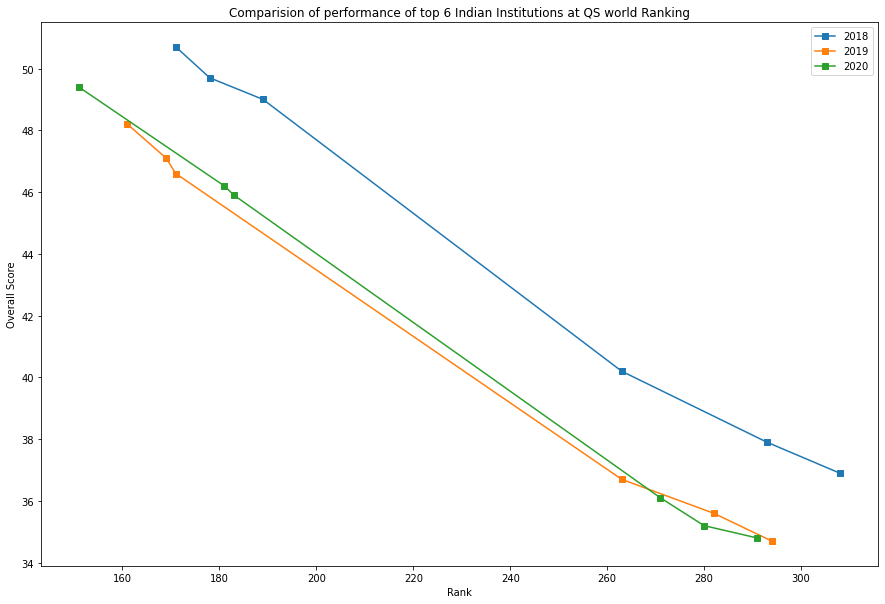

In [23]:
df_2018_india=df_2018.loc[df_2018['Country']=='India'].head(6)
df_2019_india=df_2019.loc[df_2019['Country']=='India'].head(6)
df_2020_india=df_2020.loc[df_2020['Country']=='India'].head(6)
for i in range(6):
    df_2018_india['Overall Score'].iloc[i]=float(df_2018_india['Overall Score'].iloc[i])
    df_2019_india['Overall Score'].iloc[i]=float(df_2019_india['Overall Score'].iloc[i])
    df_2020_india['Overall Score'].iloc[i]=float(df_2020_india['Overall Score'].iloc[i])
plt.figure(figsize=(15, 10))    
plt.plot(df_2018_india.index,df_2018_india['Overall Score'],'s-',label="2018")
plt.plot(df_2019_india.index,df_2019_india['Overall Score'],'s-',label="2019")
plt.plot(df_2020_india.index,df_2020_india['Overall Score'],'s-',label="2020")
plt.ylabel("Overall Score")
plt.xlabel("Rank")
plt.title("Comparision of performance of top 6 Indian Institutions at QS world Ranking")
plt.legend()
plt.show()